## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Check the number of rows in study_results
results_count = len(study_results) 
results_count

1893

In [3]:
# Check the number of unique mice and timepoint in the study_results using groupby
results_group = study_results.groupby(["Mouse ID","Timepoint"])
results_group_count = len(results_group)
results_group_count

1888

In [4]:
# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint
dfObj = pd.DataFrame(mouse_study, columns=["Mouse ID","Timepoint"])

# Get all the data for the duplicate mouse data in study
duplicateRow = mouse_study[dfObj.duplicated()]
duplicateRow

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse data by its ID
mouse_study.drop_duplicates(subset=["Mouse ID","Timepoint"])

mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Check the number of mice in the clean DataFrame
clean_count = len(mouse_study) 
clean_count

1893

## Summary Statistics

In [8]:
# Calculate Summary Statistics using a single groupby function
mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var','std','sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Calculate Summary Statistics by creating multiple series and putting them all together at the end
drug_group = mouse_study.groupby(["Drug Regimen"])
vt_mean = drug_group["Tumor Volume (mm3)"].mean()
vt_median = drug_group["Tumor Volume (mm3)"].median()
vt_variance = drug_group["Tumor Volume (mm3)"].var()
vt_std_dev = drug_group["Tumor Volume (mm3)"].std()
vt_SEM = drug_group["Tumor Volume (mm3)"].sem()

# Summary Statistics dataframe
summary_statistics = pd.DataFrame({
    "Mean": vt_mean,
    "Median": vt_median,
    "Variance": vt_variance,
    "Standard Deviation": vt_std_dev,    
    "SEM": vt_SEM    
})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
# Charting the total number of mice in each treatment regimen throughout the course of the study
# To plot a chart using pandas, collect the data and create a DataFrame that will be used to plot the chart
drug_group = mouse_study.groupby(["Drug Regimen"])
data_points = drug_group["Timepoint"].count()
drug = drug_group["Drug Regimen"].unique().str.get(0)

drug_summary = pd.DataFrame({
    "Drug": drug,
    "Data Points": data_points
})
drug_summary.reset_index(drop=True, inplace=True)
drug_summary

,Drug,Data Points
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,161
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


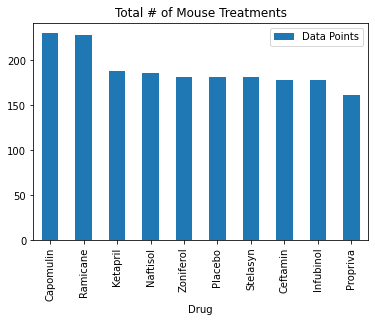

In [11]:
# Bar Chart of a pandas DataFrame
drug_summary.sort_values("Data Points", ascending=False).plot.bar(x="Drug", y="Data Points", rot=90, title="Total # of Mouse Treatments")

In [12]:
df_sorted_desc = drug_summary.sort_values("Data Points",ascending=False)
df_sorted_desc

,Drug,Data Points
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,161


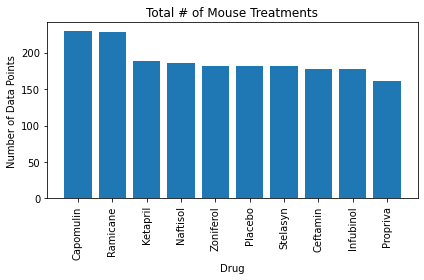

In [13]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
plt.bar("Drug", "Data Points",data=df_sorted_desc)
plt.title("Total # of Mouse Treatments")
plt.xlabel("Drug")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Female versus male mice
gender_group = mouse_study.groupby(["Sex"])
mice = gender_group["Mouse ID"].count()
gender = gender_group["Sex"].unique().str.get(0)

gender_summary = pd.DataFrame({
    "Gender": gender,
    "Mice": mice
})
gender_summary.reset_index(drop=True, inplace=True)
gender_summary

,Gender,Mice
0,Female,935
1,Male,958


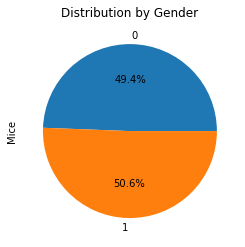

In [15]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
gender_summary.plot.pie(y="Mice", title="Distribution by Gender", legend=False, autopct='%1.1f%%')

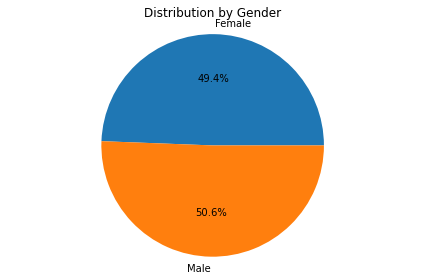

In [16]:
plt.pie(gender_summary["Mice"], labels=gender_summary["Gender"],autopct='%1.1f%%')
plt.title("Distribution by Gender")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

drug_subset = mouse_study[mouse_study["Drug Regimen"].isin(drug_list)]
drug_subset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
29,c326,0,45.000000,0,Infubinol,Female,18,25
30,c139,0,45.000000,0,Infubinol,Male,11,28
31,v339,0,45.000000,0,Infubinol,Male,20,26
32,a577,0,45.000000,0,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
1879,a644,45,32.978522,1,Ramicane,Female,7,17
1885,i177,45,33.562402,3,Ramicane,Male,10,18
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17


In [18]:
# Getting the tumor volume at the last timepoint for each mouse
subset_group = drug_subset.loc[drug_subset.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].idxmax()]
subset_group.reset_index(drop=True, inplace=True)
subset_group

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,s508,45,30.276232,0,Ramicane,Male,1,17
96,u196,45,40.667713,3,Ramicane,Male,18,25
97,w678,5,43.166373,0,Ramicane,Female,5,24
98,y449,15,44.183451,0,Ramicane,Male,19,24


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers

for i in range(len(drug_list)): 
    print(drug_list[i]) 
    drug_df = subset_group.loc[subset_group["Drug Regimen"] == drug_list[i]]
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile quartile of tumor volume is: {iqr}")
    print(f"The median quartile of tumor volume is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"List of possible outliers:")
    outlier = drug_df[(drug_df["Tumor Volume (mm3)"] < lower_bound) | (drug_df["Tumor Volume (mm3)"] > upper_bound)]
    print(outlier)
    print()

Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile quartile of tumor volume is: 7.781863460000004
The median quartile of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
List of possible outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile quartile of tumor volume is: 9.098536719999998
The median quartile of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
List of possible outliers:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

Infubinol
The 

Text(0.5, 1.0, 'Boxplot of Tumor Volume')

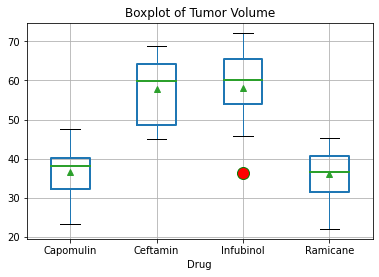

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Create empty list to fill with tumor vol data (for plotting)
df1 = pd.DataFrame(columns=["Drug","Tumor Volume"])

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for i in range(len(drug_list)): 
    drug_df = subset_group.loc[subset_group["Drug Regimen"] == drug_list[i]]
    for index, row in drug_df.iterrows():
        to_append = row["Drug Regimen"],row["Tumor Volume (mm3)"]
        a_series = pd.Series(to_append, index = df1.columns)
        df1 = df1.append(a_series, ignore_index=True)

boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='k')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

ax = df1.boxplot(column=["Tumor Volume"],
                by="Drug",
                showfliers=True, showmeans=True,
                boxprops=boxprops,
                medianprops=medianprops,
                flierprops=flierprops)

# get rid of the automatic title
plt.suptitle("")
ax.set_title("Boxplot of Tumor Volume")

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
# User will input drug regimen for analysis
drug_df = mouse_study.groupby(["Drug Regimen"])
drug = drug_df["Drug Regimen"].unique().str.get(0)

drug_list = pd.DataFrame({
    "Drug": drug
})
drug_list.reset_index(drop=True, inplace=True)
drug_list

,Drug
0,Capomulin
1,Ceftamin
2,Infubinol
3,Ketapril
4,Naftisol
5,Placebo
6,Propriva
7,Ramicane
8,Stelasyn
9,Zoniferol


In [22]:
input_drug = input('Enter drug for analysis: ')

Enter drug for analysis: Capomulin


In [23]:
drug_selected = mouse_study[mouse_study["Drug Regimen"] == input_drug]
drug_selected

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [24]:
# User will input mouse for analysis
mouse_group = drug_selected.groupby(["Mouse ID"])
mouse = mouse_group["Mouse ID"].unique().str.get(0)

mouse_summary = pd.DataFrame({
    "Mouse": mouse
})
mouse_summary.reset_index(drop=True, inplace=True)
mouse_summary

,Mouse
0,b128
1,b742
2,f966
3,g288
4,g316
5,i557
6,i738
7,j119
8,j246
9,l509


In [25]:
input_mouse = input('Enter mouse for analysis: ')

Enter mouse for analysis: l509


In [26]:
mouse_treatment = drug_subset[drug_subset["Mouse ID"] == input_mouse]
mouse_treatment

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207289,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


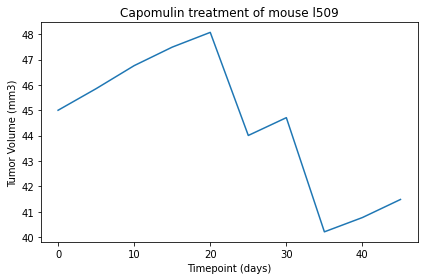

In [27]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
# Create a graph based upon the two lists we have created
plt.plot(mouse_treatment["Timepoint"], mouse_treatment["Tumor Volume (mm3)"])
plt.title(input_drug + ' treatment of mouse ' + input_mouse)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

weight_group = drug_selected.groupby(["Mouse ID", "Weight (g)"])

In [29]:
weight_group.mean()

,,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months
Mouse ID,Weight (g),,,,
b128,22,22.5,41.963636,0.70,9.0
b742,21,22.5,40.083699,0.00,7.0
f966,17,10.0,36.505973,0.00,16.0
g288,19,22.5,41.990097,0.80,3.0
g316,22,22.5,44.613344,1.00,22.0
i557,24,22.5,44.805810,0.20,1.0
i738,20,22.5,39.141053,0.60,23.0
j119,23,22.5,44.465236,0.60,7.0
j246,21,17.5,43.216925,0.25,21.0


In [34]:
mouse = weight_group["Mouse ID"].unique().str.get(0)
weight = weight_group["Weight (g)"].unique().str.get(0)
avg_vol = weight_group["Tumor Volume (mm3)"].mean()

weight_summary = pd.DataFrame({
    "Mouse": mouse,
    "Weight": weight,
    "Average Tumor Volume (mm3)": avg_vol
})
weight_summary.reset_index(drop=True, inplace=True)
weight_summary

,Mouse,Weight,Average Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


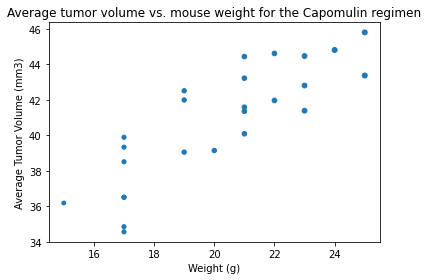

In [35]:
plt.scatter(weight_summary["Weight"], weight_summary["Average Tumor Volume (mm3)"], s=weight_summary["Weight"])
plt.title('Average tumor volume vs. mouse weight for the ' + input_drug + ' regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(weight_summary["Weight"], weight_summary["Average Tumor Volume (mm3)"])
vc_fit = vc_slope * weight_summary["Weight"] + vc_int

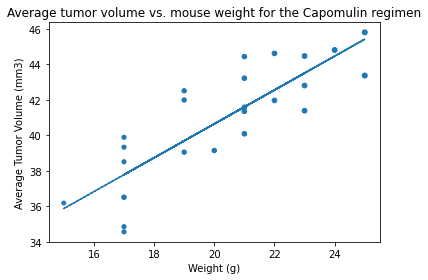

In [37]:
plt.scatter(weight_summary["Weight"], weight_summary["Average Tumor Volume (mm3)"], s=weight_summary["Weight"])
plt.plot(weight_summary["Weight"],vc_fit,"--")
plt.title('Average tumor volume vs. mouse weight for the ' + input_drug + ' regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()